#Google BigQuery and New York Taxi data


Google provides a service called BigQuery which allows users to query massive data sets in fractionally comparative times to local machine querying, check it out here : https://cloud.google.com/bigquery/what-is-bigquery

NYC Taxi Trips have now beenofficially shared by the NYC TLC, up-to-date (June 2015) data providing a huge data playground for those interested to play with the data: http://www.nyc.gov/html/tlc/downloads/pdf/press_release_08_03_15.pdf


NYC Taxi Trips Big Query tables are found here:

https://bigquery.cloud.google.com/table/nyc-tlc:yellow.trips_2014

https://bigquery.cloud.google.com/table/nyc-tlc:yellow.trips_2015

https://bigquery.cloud.google.com/table/nyc-tlc:green.trips_2014

https://bigquery.cloud.google.com/table/nyc-tlc:green.trips_2015


In this notebook I will demonstrate how you can connect to the google big query developer environment and use it to quickly query the NYC Taxi Trips. We will then plot the longitude and latitude co-ordinates of each pick-up postion on a map.

The first step was getting the data into pandas. In this situation it was much easier to query the data from GBQ than to download the individual CSV files. (Note that you must have the google-api-python-client installed and and be logged into GBQ and create a new project for this to work properly). Pandas has an included pandas.io.gbq module that allows you to parse the results of a GBQ query into a dataframe very easily. The following query creates a dataframe that includes the latitude and longitude of all pickup locations in 2015, this ends up being around 750,000 records.

http://nbviewer.ipython.org/gist/MarcusoHanlon/4bc59cdf15bc3e9270d0


In [1]:
import pandas as pd

import matplotlib  
import matplotlib.pyplot as plt  
#Inline Plotting for Ipython Notebook 
%matplotlib inline 

Quickly query the database and see how many trips there were each month of 2014

In [2]:
df=pd.io.gbq.read_gbq("""  
SELECT LEFT(STRING(pickup_datetime), 7) month, COUNT(*) trips
FROM [nyc-tlc:yellow.trips_2014] 
GROUP BY 1
ORDER BY 1  
""", project_id='fair-future-103511')
df

Waiting on bqjob_r1e7e8b04_0000014f22dfb112_1 ... (0s) Current status: DONE   


,month,trips
0,2014-01,13782492
1,2014-02,13063791
2,2014-03,15428127
3,2014-04,14618759
4,2014-05,14774041
5,2014-06,13813029
6,2014-07,13106365
7,2014-08,12688877
8,2014-09,13374016
9,2014-10,14232487


Wow there is approximately 13million taxis used a month in NY. THAT'S HUGE

Now for the good stuff

Lets query the database and find every longitude and latitude point, we can then use this dataframe to plot all taxi trips

In [3]:
df1=pd.io.gbq.read_gbq("""  
SELECT ROUND(pickup_latitude, 4) as lat, ROUND(pickup_longitude, 4) as long, COUNT(*) as num_pickups  
FROM [nyc-tlc:yellow.trips_2014]  
WHERE (pickup_latitude BETWEEN 40.61 AND 40.91) AND (pickup_longitude BETWEEN -74.06 AND -73.77 )  
GROUP BY lat, long  
""", project_id='fair-future-103511')

Waiting on bqjob_r56470adf_0000014f22dfbbec_2 ... (0s) Current status: DONE   


In [4]:
df1.head()

,lat,long,num_pickups
0,40.7469,-73.9850,818
1,40.7253,-73.9954,2357
2,40.7569,-73.9668,1539
3,40.7646,-73.9684,1273
4,40.7614,-73.9643,1533


We have now grouped all pick-up points into unique Longitude and Latitude coordinates, now we simply plot them to see what it looks like

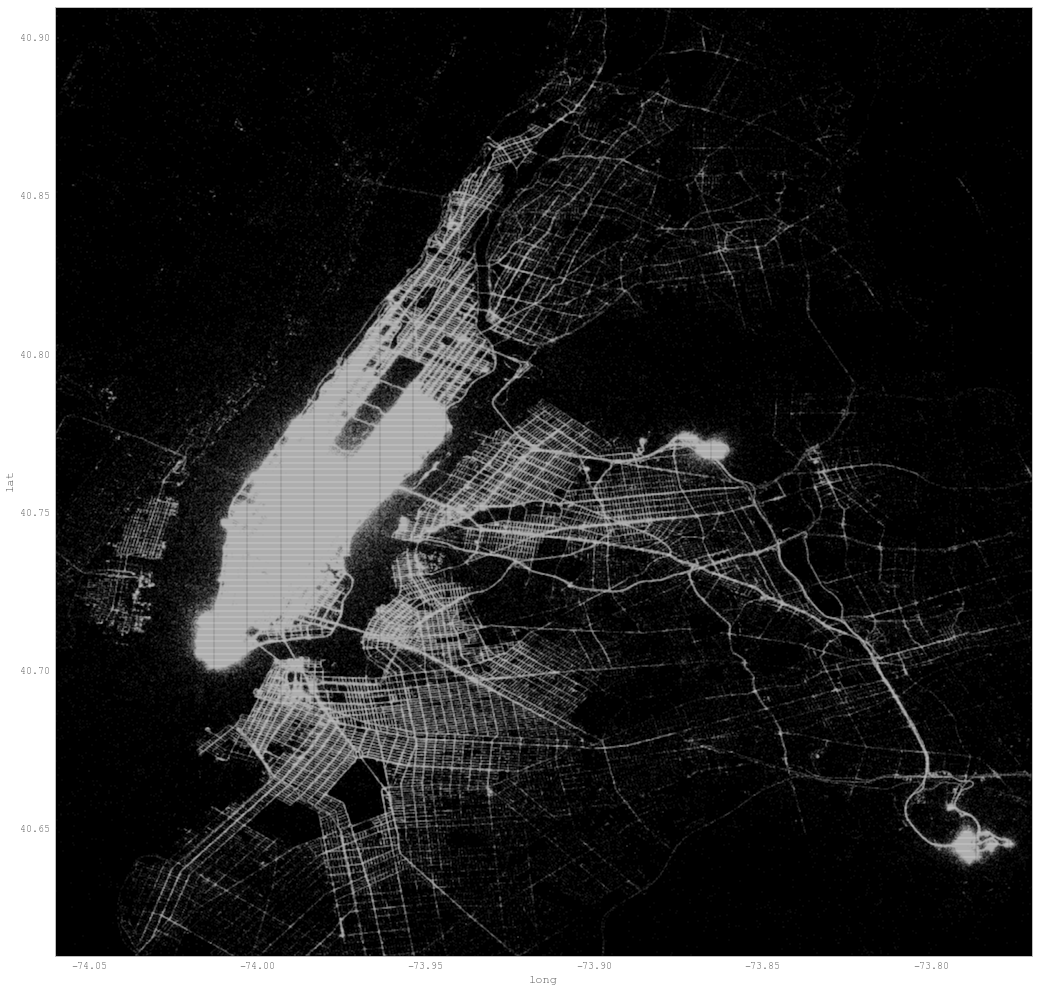

In [5]:
pd.options.display.mpl_style = 'default' #Better Styling  
new_style = {'grid': False} #Remove grid  
matplotlib.rc('axes', **new_style)  
from matplotlib import rcParams  
rcParams['figure.figsize'] = (17.5, 17) #Size of figure  
rcParams['figure.dpi'] = 250

#P.set_axis_bgcolor('black') #Background Color

P=df1.plot(kind='scatter', x='long', y='lat',color='white',xlim=(-74.06,-73.77),ylim=(40.61, 40.91),s=.02,alpha=.6)
P.set_axis_bgcolor('black')

In [6]:
#cHECK Current Working Directory

#import os
#os.getcwd()

In [7]:
fig = P.get_figure()
fig.savefig("output.png")
